**Exercise 8.3** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, lam, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of lam, then computes their mean error and RMSE.

Is this way of making an estimate biased?  
Plot the sampling distribution of the estimates and the 90% confidence interval.  
What is the standard error?  
What happens to sampling error for increasing values of lam?

**IMPORTANT!** [ThinkStats2](https://github.com/AllenDowney/ThinkStats2) should be cloned ../.. relative to this dir.

In [1]:
import sys
import os
import math
import itertools

import numpy as np
import pandas as pd

In [2]:
import thinkstats2_path
import thinkstats2
import thinkplot

In [3]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def MeanError(estimates, actual):
    return np.mean(estimates) - actual

In [4]:
def GameSimulator(lam=1):
    """Simulate a game by using the goal scoring rate
    Args:
        lam (float): the goal scoring rate
    Returns:
        int: the number of goals in the simulated game
    """
    # An exponential distribution will model the interval between events 
    # for a fixed rate of events. The values are multiple of the denominator
    # used for the rate, which in this case is the game duration. 
    # Draw random samples (representing fractions of the game 
    # duration) as long as their sum is <= 1 and return their
    # number.
    t_norm = 0. # Normalized time (/game duration)
    n_goals = 0
    while True:
        t_norm += np.random.exponential(1/lam, 1)
        if t_norm > 1:
            break
        n_goals += 1
    return n_goals

In [5]:
def RunSimulations(lam=1, m=1000):
    estimates = [GameSimulator(lam) for _ in range(m)]
    pmf = thinkstats2.Pmf(estimates, label="lam={}, m={}".format(lam, m))
    me = MeanError(estimates, lam)
    rmse = RMSE(estimates, lam)
    cdf = thinkstats2.Cdf(pmf)
    conf_int_90 = cdf.Percentile(5), cdf.Percentile(95)
    return pmf, me, rmse, conf_int_90

In [6]:
def VertLine(x, y=1):
    thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

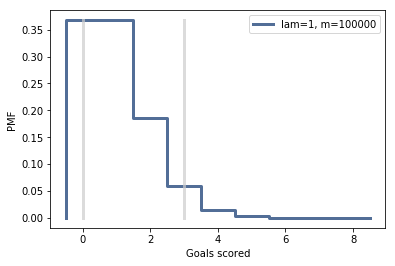

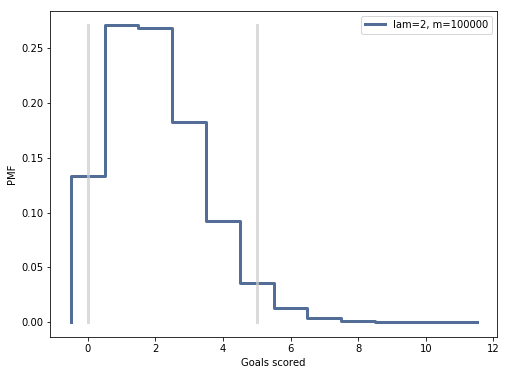

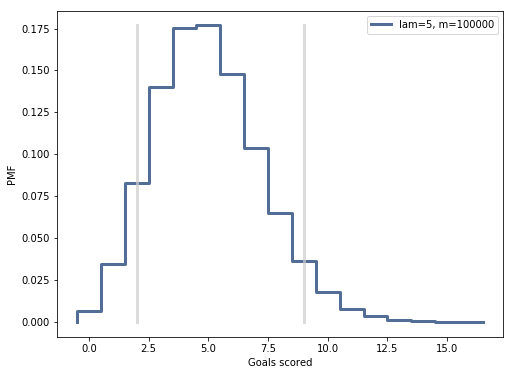

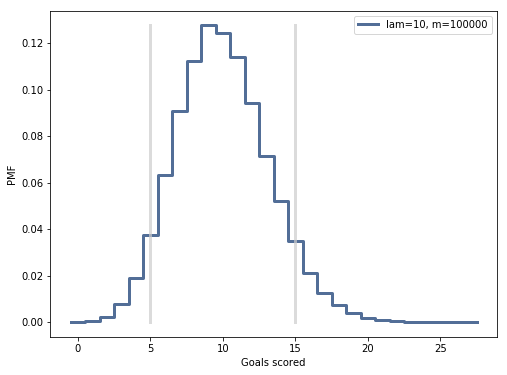

In [7]:
lam_list = [1, 2, 5, 10]
m = 100000
rows = []
for lam in lam_list:
    pmf, me, rmse, conf_int_90 = RunSimulations(lam, m)
    rows.append([me, rmse, conf_int_90])
    thinkplot.Pmf(pmf)
    thinkplot.Config(xlabel='Goals scored', ylabel='PMF')
    VertLine(conf_int_90[0], pmf.MaxLike())
    VertLine(conf_int_90[1], pmf.MaxLike())    
    thinkplot.Show()

In [11]:
df = pd.DataFrame(rows, columns=['Mean Error', 'Stderr', '90% Confidence Interval'], index=lam_list)
df.index.name = 'Goal Scoring Rate (lam)'
print(df)
print()
print("Total Mean Error={:.6f}".format(df['Mean Error'].sum()))

                         Mean Error    Stderr 90% Confidence Interval
Goal Scoring Rate (lam)                                              
1                           0.00136  1.000440                  (0, 3)
2                           0.00831  1.415927                  (0, 5)
5                          -0.00245  2.227772                  (2, 9)
10                         -0.00521  3.159160                 (5, 15)

Total Mean Error=0.002010
